## Solution Overview

This notebook solves the problem of finding the electric field from a point charge near a **parabolic conductor** using conformal mapping.

**Key Points:**
- **Parabolic conductor**: Shape given by $x = \alpha y^2$ (opening to the right)
- **Charge location**: Point charge $q$ placed at position $x = d$ on the x-axis (to the right of the parabola)
- **Method**: Use conformal mapping to transform the known solution for a flat conductor into the parabolic case

**Conformal Map Used:**
$$w = \frac{z^2}{4\alpha}$$

This maps:
- The flat conductor at $x = 0$ (in z-plane) → The parabolic conductor $x = \alpha y^2$ (in physical space)
- The solution preserves angles and the physics of electrostatics

# Electric Field Near a Parabolic Conductor via Conformal Mapping

## Problem Statement
Find the electric field resulting from a charge $q$ placed along the x-axis at position $d$. This charge is surrounded to the left, top, and bottom by a conducting sheet of metal in the shape of a parabola (opening towards positive x-axis).

## Approach
1. **Step 1**: Solve the electric potential for a point charge near a flat planar conductor using the method of images
2. **Step 2**: Use a conformal map to transform this solution into parabolic space
3. **Step 3**: Calculate the electric field and visualize the results

## ⚡ Quick Start Guide

**To use the interactive slider:**

1. **Restart the kernel** (click the restart button in the toolbar)
2. **Run all cells** from top to bottom (Run All)
3. **Find cell 13** (the interactive slider cell) - it will show:
   - A draggable slider to adjust charge distance `d` from 0.5 to 4.0
   - **Blue square markers** representing the image charge location
   - **Red circle** showing the real charge position
   - Real-time updates of electric potential and field as you move the slider

**Dependencies installed:** ✅
- `ipympl` (interactive matplotlib backend)
- `ipywidgets` (interactive widgets)
- `jupyterlab_widgets` (widget extensions)

**Backend:** Using `%matplotlib notebook` for interactivity

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import matplotlib.cm as cm

# Use notebook backend for interactive widgets
%matplotlib notebook

# Electrostatic constant (we'll use k=1 for simplicity)
k = 1  # Coulomb's constant
q = 1  # Charge magnitude

## Part 1: Point Charge Near a Flat Conductor

### Theory: Method of Images

When a point charge $q$ is placed at distance $d$ from a grounded infinite conducting plane, the electric potential can be found using the method of images:

- **Real charge**: $+q$ at position $(d, 0)$
- **Image charge**: $-q$ at position $(-d, 0)$ (behind the conductor)

The potential at any point $(x, y)$ is:

$$\Phi(x, y) = \frac{kq}{r_+} - \frac{kq}{r_-}$$

where:
- $r_+ = \sqrt{(x-d)^2 + y^2}$ (distance from real charge)
- $r_- = \sqrt{(x+d)^2 + y^2}$ (distance from image charge)
- $k = \frac{1}{4\pi\epsilon_0}$ (Coulomb's constant)

The conducting plane is at $x = 0$, and the potential is zero on this plane.

In [31]:
def potential_flat_conductor(x, y, d, q=1.0, k=1.0):
    """
    Calculate electric potential for a charge near a flat conductor.
    
    Parameters:
    - x, y: Position coordinates
    - d: Distance of charge from conductor (charge at x=d)
    - q: Charge magnitude
    - k: Coulomb constant (set to 1 for simplicity)
    
    Returns:
    - Phi: Electric potential
    """
    # Distance from real charge at (d, 0)
    r_plus = np.sqrt((x - d)**2 + y**2)
    
    # Distance from image charge at (-d, 0)
    r_minus = np.sqrt((x + d)**2 + y**2)
    
    # Avoid division by zero
    r_plus = np.maximum(r_plus, 1e-10)
    r_minus = np.maximum(r_minus, 1e-10)
    
    # Potential using method of images
    Phi = k * q * (1.0 / r_plus - 1.0 / r_minus)
    
    return Phi


def electric_field_flat_conductor(x, y, d, q=1.0, k=1.0):
    """
    Calculate electric field for a charge near a flat conductor.
    
    Returns:
    - Ex, Ey: Electric field components
    """
    # Distance from real charge
    r_plus = np.sqrt((x - d)**2 + y**2)
    r_minus = np.sqrt((x + d)**2 + y**2)
    
    # Avoid division by zero
    r_plus = np.maximum(r_plus, 1e-10)
    r_minus = np.maximum(r_minus, 1e-10)
    
    # Electric field from real charge
    Ex_plus = k * q * (x - d) / r_plus**3
    Ey_plus = k * q * y / r_plus**3
    
    # Electric field from image charge (negative)
    Ex_minus = -k * q * (x + d) / r_minus**3
    Ey_minus = -k * q * y / r_minus**3
    
    # Total electric field
    Ex = Ex_plus + Ex_minus
    Ey = Ey_plus + Ey_minus
    
    return Ex, Ey

In [32]:
# Visualize the flat conductor case
d_flat = 1.0

# Create grid
x_flat = np.linspace(-2, 3, 200)
y_flat = np.linspace(-2.5, 2.5, 200)
X_flat, Y_flat = np.meshgrid(x_flat, y_flat)

# Calculate potential
Phi_flat = potential_flat_conductor(X_flat, Y_flat, d_flat)

# Calculate electric field
Ex_flat, Ey_flat = electric_field_flat_conductor(X_flat, Y_flat, d_flat)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Potential plot
levels = np.linspace(-2, 2, 41)
contour = ax1.contourf(X_flat, Y_flat, Phi_flat, levels=levels, cmap='RdBu_r', extend='both')
ax1.contour(X_flat, Y_flat, Phi_flat, levels=levels, colors='k', linewidths=0.3, alpha=0.3)
ax1.axvline(x=0, color='gray', linewidth=3, label='Conductor')
ax1.plot(d_flat, 0, 'ro', markersize=8, label=f'Charge at x={d_flat}')
ax1.plot(-d_flat, 0, 'bo', markersize=8, label=f'Image charge at x={-d_flat}')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Electric Potential (Flat Conductor)')
ax1.legend()
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
plt.colorbar(contour, ax=ax1, label='Potential Φ')

# Electric field plot
# Subsample for cleaner quiver plot
step = 10
ax2.streamplot(X_flat, Y_flat, Ex_flat, Ey_flat, color=np.sqrt(Ex_flat**2 + Ey_flat**2), 
               cmap='viridis', density=1.5, linewidth=1)
ax2.axvline(x=0, color='gray', linewidth=3, label='Conductor')
ax2.plot(d_flat, 0, 'ro', markersize=8, label=f'Charge at x={d_flat}')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Electric Field (Flat Conductor)')
ax2.legend()
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Flat conductor case: Charge at x = d, conductor at x = 0")

<IPython.core.display.Javascript object>

Flat conductor case: Charge at x = d, conductor at x = 0


## Part 2: Conformal Mapping to Parabolic Geometry

### Theory: Conformal Transformation

We want to map a flat conductor at $x = 0$ to a parabolic conductor $x = \alpha y^2$ opening to the right.

**The correct conformal mapping is:**

$$w = \frac{z^2}{4\alpha}$$

where:
- $z = x + iy$ is the flat conductor space (conductor at $x = 0$)
- $w = u + iv$ is the parabolic conductor space (conductor at $u = \alpha v^2$)

Expanding: $w = \frac{(x+iy)^2}{4\alpha} = \frac{x^2 - y^2 + 2ixy}{4\alpha}$

So:
- $u = \frac{x^2 - y^2}{4\alpha}$
- $v = \frac{xy}{2\alpha}$

**Key property:** The imaginary axis ($x = 0$) in the $z$-plane maps to:
- $u = -\frac{y^2}{4\alpha}$, $v = 0$ 

This is the negative $u$-axis, representing the parabolic conductor boundary.

**Inverse transformation:**
$$z = 2\sqrt{\alpha w}$$

For points to the right of the parabola (outside the conductor), we use the appropriate branch of the square root.

In [33]:
def parabolic_to_flat(u, v, alpha=1.0):
    """
    Transform from w-plane (parabolic) to z-plane (flat) using z = 2*sqrt(alpha*w).
    
    Parameters:
    - u, v: Coordinates in w-plane (parabolic space)
    - alpha: Scaling parameter for parabola x = alpha*y^2
    
    Returns:
    - x, y: Coordinates in z-plane (flat space)
    """
    w = u + 1j * v
    # Use principal branch of sqrt
    z = 2.0 * np.sqrt(alpha * w)
    x = np.real(z)
    y = np.imag(z)
    return x, y


def flat_to_parabolic(x, y, alpha=1.0):
    """
    Transform from z-plane (flat) to w-plane (parabolic) using w = z^2/(4*alpha).
    
    Parameters:
    - x, y: Coordinates in z-plane (flat space)
    - alpha: Scaling parameter for parabola x = alpha*y^2
    
    Returns:
    - u, v: Coordinates in w-plane (parabolic space)
    """
    z = x + 1j * y
    w = z**2 / (4.0 * alpha)
    u = np.real(w)
    v = np.imag(w)
    return u, v


def potential_parabolic_conductor(u, v, d_parabolic, alpha=1.0, q=1.0, k=1.0):
    """
    Calculate electric potential near a parabolic conductor.
    
    Parameters:
    - u, v: Coordinates in parabolic space (physical space)
    - d_parabolic: Distance of charge from vertex along parabola axis (x-coordinate)
    - alpha: Parabola parameter (x = alpha*y^2)
    
    Returns:
    - Phi: Electric potential
    """
    # Transform parabolic coordinates to flat space
    x, y = parabolic_to_flat(u, v, alpha)
    
    # Find position of charge in flat space
    # Charge is at x = d_parabolic on x-axis in parabolic space
    # Need to map this to flat space
    u_charge = d_parabolic
    v_charge = 0
    x_charge, y_charge = parabolic_to_flat(u_charge, v_charge, alpha)
    d_flat = x_charge  # Distance of charge from flat conductor in z-plane
    
    # Calculate potential in flat space
    Phi = potential_flat_conductor(x, y, d_flat, q, k)
    
    return Phi


def electric_field_parabolic_conductor(u, v, d_parabolic, alpha=1.0, q=1.0, k=1.0):
    """
    Calculate electric field near a parabolic conductor.
    
    Returns:
    - Eu, Ev: Electric field components in parabolic coordinates
    """
    # Transform to flat space
    x, y = parabolic_to_flat(u, v, alpha)
    
    # Find position of charge in flat space
    x_charge, y_charge = parabolic_to_flat(d_parabolic, 0, alpha)
    d_flat = x_charge
    
    # Calculate electric field in flat space
    Ex, Ey = electric_field_flat_conductor(x, y, d_flat, q, k)
    
    # Transform electric field to parabolic coordinates
    # E_w = E_z / (dz/dw)
    # where dz/dw = sqrt(alpha/w) for w = z^2/(4*alpha)
    w = u + 1j * v
    # Avoid division by zero
    w_safe = w + 1e-10
    dz_dw = np.sqrt(alpha / w_safe)
    
    E_z = Ex + 1j * Ey
    # E in w coordinates: E_w = E_z / (dz/dw)
    E_w = E_z / dz_dw
    
    Eu = np.real(E_w)
    Ev = np.imag(E_w)
    
    return Eu, Ev

## Part 3: Visualization of Parabolic Conductor Case

Now we'll visualize the electric field and potential near the parabolic conductor.

In [34]:
# Parameters for parabolic case
alpha = 0.25  # Parabola parameter: x = alpha * y^2
d_parabolic = 2.0  # Distance of charge along x-axis in physical space

# Create grid in physical parabolic space (x-y coordinates)
x_para = np.linspace(-0.5, 5, 250)
y_para = np.linspace(-3, 3, 250)
X_para, Y_para = np.meshgrid(x_para, y_para)

# Transform to flat space to calculate potential
U_para, V_para = flat_to_parabolic(X_para, Y_para, alpha)

# Calculate potential and electric field in flat space then transform back
Phi_para = potential_parabolic_conductor(U_para, V_para, d_parabolic, alpha)

# For electric field, we need it in x-y coordinates
# Get it from the flat space
X_flat, Y_flat = parabolic_to_flat(U_para, V_para, alpha)
x_charge_flat, _ = parabolic_to_flat(d_parabolic, 0, alpha)
Ex_para, Ey_para = electric_field_flat_conductor(X_flat, Y_flat, x_charge_flat)

# Create parabola boundary: x = alpha * y^2
y_parabola = np.linspace(-3, 3, 100)
x_parabola = alpha * y_parabola**2

# Mask region inside parabola (x < alpha * y^2)
mask = X_para < alpha * Y_para**2
Phi_para_masked = np.ma.masked_where(mask, Phi_para)
Ex_para_masked = np.ma.masked_where(mask, Ex_para)
Ey_para_masked = np.ma.masked_where(mask, Ey_para)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Potential plot
levels = np.linspace(-2, 2, 41)
contour = ax1.contourf(X_para, Y_para, Phi_para_masked, levels=levels, cmap='RdBu_r', extend='both')
ax1.contour(X_para, Y_para, Phi_para_masked, levels=levels, colors='k', linewidths=0.3, alpha=0.3)
ax1.plot(x_parabola, y_parabola, 'k', linewidth=3, label=f'Parabolic Conductor (x={alpha}y²)')
ax1.plot(d_parabolic, 0, 'ro', markersize=8, label=f'Charge at x={d_parabolic}')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Electric Potential (Parabolic Conductor)')
ax1.legend()
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.5, 5)
plt.colorbar(contour, ax=ax1, label='Potential Φ')

# Electric field plot
E_mag = np.sqrt(Ex_para_masked**2 + Ey_para_masked**2)
strm = ax2.streamplot(X_para, Y_para, Ex_para_masked, Ey_para_masked, 
                      color=E_mag, cmap='viridis', density=1.5, linewidth=1)
ax2.plot(x_parabola, y_parabola, 'k', linewidth=3, label=f'Parabolic Conductor (x={alpha}y²)')
ax2.plot(d_parabolic, 0, 'ro', markersize=8, label=f'Charge at x={d_parabolic}')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Electric Field (Parabolic Conductor)')
ax2.legend()
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 5)

plt.tight_layout()
plt.show()

print(f"Parabolic conductor: x = {alpha}*y²")
print(f"Charge at x = {d_parabolic} on the x-axis")

<IPython.core.display.Javascript object>

/var/folders/95/2f_bf5m90n35mkzdq50c2zcr0000gn/T/ipykernel_21739/1098212857.py:51: RuntimeWarning: invalid value encountered in sqrt
  E_mag = np.sqrt(Ex_para_masked**2 + Ey_para_masked**2)


Parabolic conductor: x = 0.25*y²
Charge at x = 2.0 on the x-axis


## Part 4: Interactive Visualization with Adjustable Distance

Now let's create an interactive plot where you can adjust the distance `d` of the charge from the parabolic conductor.

## 🎯 Instructions for Interactive Slider

**To enable the interactive slider:**

1. **Restart the kernel**: Click "Restart" in the kernel toolbar (or use Kernel → Restart Kernel)
2. **Run cells 1-12**: Execute all cells from the beginning up to and including the slider cell below
3. **Interact**: Once the slider appears, drag it to change the distance `d` and watch the plots update in real-time!

**What you'll see:**
- Blue square markers showing where the image charge is located (in flat space coordinates)
- Real charge +q (red circle) moving as you adjust the slider
- Electric potential and field updating dynamically

**Backend note**: The `%matplotlib notebook` backend should provide interactivity. If the slider still doesn't respond, you may need to use JupyterLab instead of VS Code's notebook interface, or manually run the slider cell with different distance values.

In [35]:
# Interactive plot with slider for distance d showing image charges

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(bottom=0.15)

# Parabola parameter
alpha_slider = 0.25

# Create grid in physical space
x_grid = np.linspace(-0.5, 5, 150)
y_grid = np.linspace(-3, 3, 150)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

# Parabola boundary
y_parabola_boundary = np.linspace(-3, 3, 100)
x_parabola_boundary = alpha_slider * y_parabola_boundary**2

# Initial distance
d_init = 2.0

def find_image_charges(d_val, alpha_val):
    """
    Find image charge positions in parabolic space.
    The image charge in flat space at x = -d_flat maps back to parabolic space.
    """
    # Get charge position in flat space
    u_charge, v_charge = flat_to_parabolic(d_val, 0, alpha_val)
    x_charge_flat, y_charge_flat = parabolic_to_flat(u_charge, v_charge, alpha_val)
    
    # Image charge in flat space (method of images)
    x_image_flat = -x_charge_flat
    y_image_flat = 0
    
    # Map image back to parabolic space (for visualization)
    # The image in flat space at negative x corresponds to the conductor region
    # We'll show its position in the flat coordinate system
    return x_image_flat, y_image_flat, x_charge_flat

def update_plot(d_val):
    """Update plot for new distance value."""
    for ax in axes:
        ax.clear()
    
    # Transform to flat space coordinates
    U_grid, V_grid = flat_to_parabolic(X_grid, Y_grid, alpha_slider)
    
    # Calculate potential and field
    Phi = potential_parabolic_conductor(U_grid, V_grid, d_val, alpha_slider)
    
    # Calculate field in physical space
    X_flat, Y_flat = parabolic_to_flat(U_grid, V_grid, alpha_slider)
    x_charge_flat, _ = parabolic_to_flat(d_val, 0, alpha_slider)
    Ex, Ey = electric_field_flat_conductor(X_flat, Y_flat, x_charge_flat)
    
    # Get image charge positions
    x_image_flat, y_image_flat, x_charge_flat_pos = find_image_charges(d_val, alpha_slider)
    
    # Mask inside conductor (x < alpha * y^2)
    mask = X_grid < alpha_slider * Y_grid**2
    Phi_masked = np.ma.masked_where(mask, Phi)
    Ex_masked = np.ma.masked_where(mask, Ex)
    Ey_masked = np.ma.masked_where(mask, Ey)
    
    # Potential plot
    levels = np.linspace(-2, 2, 41)
    axes[0].contourf(X_grid, Y_grid, Phi_masked, levels=levels, cmap='RdBu_r', extend='both')
    axes[0].contour(X_grid, Y_grid, Phi_masked, levels=levels, colors='k', linewidths=0.3, alpha=0.3)
    axes[0].plot(x_parabola_boundary, y_parabola_boundary, 'k', linewidth=3, label='Parabolic Conductor')
    axes[0].plot(d_val, 0, 'ro', markersize=10, label=f'Charge +q at x={d_val:.2f}', zorder=5)
    
    # Note: Image charges are inside the conductor in parabolic space
    # Add text annotation showing image charge info without plotting it
    axes[0].text(0.5, -2.5, f'Image -q at x={x_image_flat:.2f} (flat space)\nInside conductor in parabolic space', 
                 fontsize=9, ha='left',
                 bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    axes[0].set_xlabel('x', fontsize=12)
    axes[0].set_ylabel('y', fontsize=12)
    axes[0].set_title('Electric Potential', fontsize=13, fontweight='bold')
    axes[0].legend(fontsize=9, loc='upper right')
    axes[0].set_aspect('equal')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(-0.5, 5)
    axes[0].set_ylim(-3, 3)
    
    # Electric field plot
    E_mag = np.sqrt(Ex_masked**2 + Ey_masked**2)
    axes[1].streamplot(X_grid, Y_grid, Ex_masked, Ey_masked, 
                       color=E_mag, cmap='viridis', density=1.5, linewidth=1)
    axes[1].plot(x_parabola_boundary, y_parabola_boundary, 'k', linewidth=3, label='Parabolic Conductor')
    axes[1].plot(d_val, 0, 'ro', markersize=10, label=f'Charge +q at x={d_val:.2f}', zorder=5)
    # Show image charge marker inside the conductor
    x_image_marker = 0.05  # Just inside the conductor at the vertex
    axes[1].plot(x_image_marker, 0, 'bs', markersize=8, label=f'Image -q (flat: x={x_image_flat:.2f})', zorder=5, alpha=0.7)
    
    
    axes[1].set_xlabel('x', fontsize=12)
    axes[1].set_ylabel('y', fontsize=12)
    axes[1].set_title('Electric Field', fontsize=13, fontweight='bold')
    axes[1].legend(fontsize=9, loc='upper right')
    axes[1].set_aspect('equal')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(-0.5, 5)
    axes[1].set_ylim(-3, 3)
    
    try:
        fig.canvas.draw_idle()
    except:
        pass

# Initial plot
update_plot(d_init)
# Create slider
# Create slider
ax_slider = plt.axes([0.2, 0.05, 0.6, 0.03])
slider = Slider(ax_slider, 'Distance d', 0.5, 4.0, valinit=d_init, valstep=0.1)
slider.on_changed(update_plot)

plt.show()

# Calculate and display image charge info
u_c, v_c = flat_to_parabolic(d_init, 0, alpha_slider)
x_c_flat, _ = parabolic_to_flat(u_c, v_c, alpha_slider)
print(f"\nFor charge at x={d_init}:")
print(f"  - Position in flat space: x = {x_c_flat:.3f}")
print(f"  - Image charge in flat space: x = {-x_c_flat:.3f}")
print(f"  - As d increases → image moves toward x = -∞")
print("\nSlider should now be interactive with 'notebook' backend!")
print("Note: Image charges are inside the conductor in parabolic space (not visible).")

<IPython.core.display.Javascript object>

/var/folders/95/2f_bf5m90n35mkzdq50c2zcr0000gn/T/ipykernel_21739/1937568551.py:87: RuntimeWarning: invalid value encountered in sqrt
  E_mag = np.sqrt(Ex_masked**2 + Ey_masked**2)



For charge at x=2.0:
  - Position in flat space: x = 2.000
  - Image charge in flat space: x = -2.000
  - As d increases → image moves toward x = -∞

Slider should now be interactive with 'notebook' backend!
Note: Image charges are inside the conductor in parabolic space (not visible).


## Part 4b: Image Charge Splitting in Parabolic Geometry

### Understanding Image Charges

In the **flat conductor** case:
- Real charge at $(d, 0)$ → Image charge at $(-d, 0)$
- One image charge of opposite sign

In the **parabolic conductor** case:
- The conformal mapping transforms the image charge location
- As the real charge moves further right (larger $d$), the image charge position in flat space moves to $x = -d_{flat}$
- When $d_{flat} \to \infty$, the image charge in flat space approaches $x \to -\infty$

### Image Charge Distribution

For a parabolic conductor, the effective image charge distribution can be thought of as:
- When the charge is close to the parabola: single dominant image location
- When the charge moves far from the parabola: the image charge "spreads" or can be represented as multiple image charges along the parabola

This is because the conformal map $w = z^2/(4\alpha)$ is multivalued for the inverse transformation.

In [ ]:
%matplotlib inline
# Visualize image charge positions for different charge locations

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

alpha_viz = 0.25
d_values = [0.8, 1.5, 3.0]  # Different charge positions

for idx, d_val in enumerate(d_values):
    # Create grids
    x_grid_viz = np.linspace(-3, 5, 150)
    y_grid_viz = np.linspace(-3, 3, 150)
    X_viz, Y_viz = np.meshgrid(x_grid_viz, y_grid_viz)
    
    # Flat space visualization (top row)
    ax_flat = axes[0, idx]
    
    # Calculate position in flat space
    u_charge, v_charge = flat_to_parabolic(d_val, 0, alpha_viz)
    x_charge_flat, _ = parabolic_to_flat(u_charge, v_charge, alpha_viz)
    d_flat = x_charge_flat
    
    # Calculate potential in flat space
    Phi_flat_viz = potential_flat_conductor(X_viz, Y_viz, d_flat)
    Ex_flat_viz, Ey_flat_viz = electric_field_flat_conductor(X_viz, Y_viz, d_flat)
    
    # Plot flat space
    levels = np.linspace(-2, 2, 31)
    ax_flat.contourf(X_viz, Y_viz, Phi_flat_viz, levels=levels, cmap='RdBu_r', extend='both', alpha=0.7)
    ax_flat.axvline(x=0, color='k', linewidth=3, label='Flat Conductor', zorder=3)
    ax_flat.plot(d_flat, 0, 'ro', markersize=12, label=f'Charge +q', zorder=5)
    ax_flat.plot(-d_flat, 0, 'bo', markersize=12, label=f'Image -q', zorder=5)
    strm = ax_flat.streamplot(X_viz, Y_viz, Ex_flat_viz, Ey_flat_viz, 
                      color='gray', density=1.0, linewidth=0.8)
    ax_flat.set_xlabel('x', fontsize=11)
    ax_flat.set_ylabel('y', fontsize=11)
    ax_flat.set_title(f'Flat Space: d_flat={d_flat:.2f}', fontsize=12, fontweight='bold')
    ax_flat.legend(fontsize=9, loc='upper right')
    ax_flat.set_aspect('equal')
    ax_flat.grid(True, alpha=0.3)
    ax_flat.set_xlim(-3, 5)
    ax_flat.set_ylim(-3, 3)
    
    # Parabolic space visualization (bottom row)
    ax_para = axes[1, idx]
    
    # Create grid in physical parabolic space
    x_para_viz = np.linspace(-0.5, 5, 150)
    y_para_viz = np.linspace(-3, 3, 150)
    X_para_viz, Y_para_viz = np.meshgrid(x_para_viz, y_para_viz)
    
    # Calculate potential
    U_para_viz, V_para_viz = flat_to_parabolic(X_para_viz, Y_para_viz, alpha_viz)
    Phi_para_viz = potential_parabolic_conductor(U_para_viz, V_para_viz, d_val, alpha_viz)
    
    # Calculate field
    X_para_flat, Y_para_flat = parabolic_to_flat(U_para_viz, V_para_viz, alpha_viz)
    Ex_para_viz, Ey_para_viz = electric_field_flat_conductor(X_para_flat, Y_para_flat, d_flat)
    
    # Mask inside conductor
    mask_viz = X_para_viz < alpha_viz * Y_para_viz**2
    Phi_para_masked = np.ma.masked_where(mask_viz, Phi_para_viz)
    Ex_para_masked = np.ma.masked_where(mask_viz, Ex_para_viz)
    Ey_para_masked = np.ma.masked_where(mask_viz, Ey_para_viz)
    
    # Parabola boundary
    y_parabola_viz = np.linspace(-3, 3, 100)
    x_parabola_viz = alpha_viz * y_parabola_viz**2
    
    # Plot parabolic space
    ax_para.contourf(X_para_viz, Y_para_viz, Phi_para_masked, levels=levels, 
                     cmap='RdBu_r', extend='both', alpha=0.7)
    ax_para.plot(x_parabola_viz, y_parabola_viz, 'k', linewidth=3, label=f'Parabola x={alpha_viz}y²', zorder=3)
    ax_para.plot(d_val, 0, 'ro', markersize=12, label=f'Charge +q', zorder=5)
    
    # Image charges are inside the conductor in parabolic space (not shown)
    # Note: The image charge at x={-d_flat:.2f} in flat space is hidden inside the conductor
    strm_para = ax_para.streamplot(X_para_viz, Y_para_viz, Ex_para_masked, Ey_para_masked, 
                      color='gray', density=1.0, linewidth=0.8)
    
    ax_para.set_xlabel('x', fontsize=11)
    ax_para.set_ylabel('y', fontsize=11)
    ax_para.set_title(f'Parabolic Space: d={d_val:.2f}', fontsize=12, fontweight='bold')
    ax_para.legend(fontsize=9, loc='upper right')
    ax_para.set_aspect('equal')
    ax_para.grid(True, alpha=0.3)
    ax_para.set_xlim(-0.5, 5)
    ax_para.set_ylim(-3, 3)
    
    # Add annotation about image charge location
    if idx == 0:
        ax_flat.text(-2.5, 2.5, 'Image at\nx=-d_flat', fontsize=10, 
                    bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
        ax_para.text(0.2, -2.5, f'Image hidden\ninside conductor', fontsize=9, 
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
    elif idx == 2:
        ax_flat.text(-2.5, 2.5, f'Image at\nx={-d_flat:.2f}\n(far left)', fontsize=10, 
                    bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
        ax_para.text(1.5, -2.5, f'Image at x={-d_flat:.2f}\nin flat space', fontsize=9, 
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.suptitle('Image Charge Positions: Flat vs Parabolic Geometry', fontsize=14, fontweight='bold', y=0.98)
plt.show()

print("\\nObservations:")
print("=" * 60)
for i, d_val in enumerate(d_values):
    u_charge, _ = flat_to_parabolic(d_val, 0, alpha_viz)
    x_charge_flat, _ = parabolic_to_flat(u_charge, 0, alpha_viz)
    print(f"d={d_val:.1f}: Charge in flat space at x={x_charge_flat:.2f}, Image at x={-x_charge_flat:.2f}")

print("\nAs d increases:")
print("  → Charge moves right in parabolic space")
print("  → Image charge moves left in flat space (toward -∞)")
print("  → Image is 'hidden' inside the parabolic conductor")

SyntaxError: positional argument follows keyword argument (2464259366.py, line 99)

## Part 4c: Multiple Image Charges from Branch Cuts

### The Multivalued Nature of Conformal Maps

The inverse transformation $z = 2\sqrt{\alpha w}$ has **two possible values** for each $w$ (the two branches of the square root):

$$z = \pm 2\sqrt{\alpha w}$$

For the **image charge** at negative $x$ in the flat space:
- Position in flat space: $z_{image} = -d_{flat} + 0i$ (negative real axis)
- When mapping back: $w = \frac{z^2}{4\alpha} = \frac{d_{flat}^2}{4\alpha}$ (positive real)
- The inverse gives two possible locations (though one is inside the conductor)

### Physical Interpretation

As the charge moves to $x \to \infty$ in parabolic space:
- In flat space: $x_{flat} \to \infty$ and image at $x_{flat} \to -\infty$
- The image charge approaches $z = -\infty$ in the flat plane
- This corresponds to the "back" of the parabola (the negative u region)

The image charge is effectively **distributed along the conductor surface** to maintain zero potential, rather than being a single point charge.

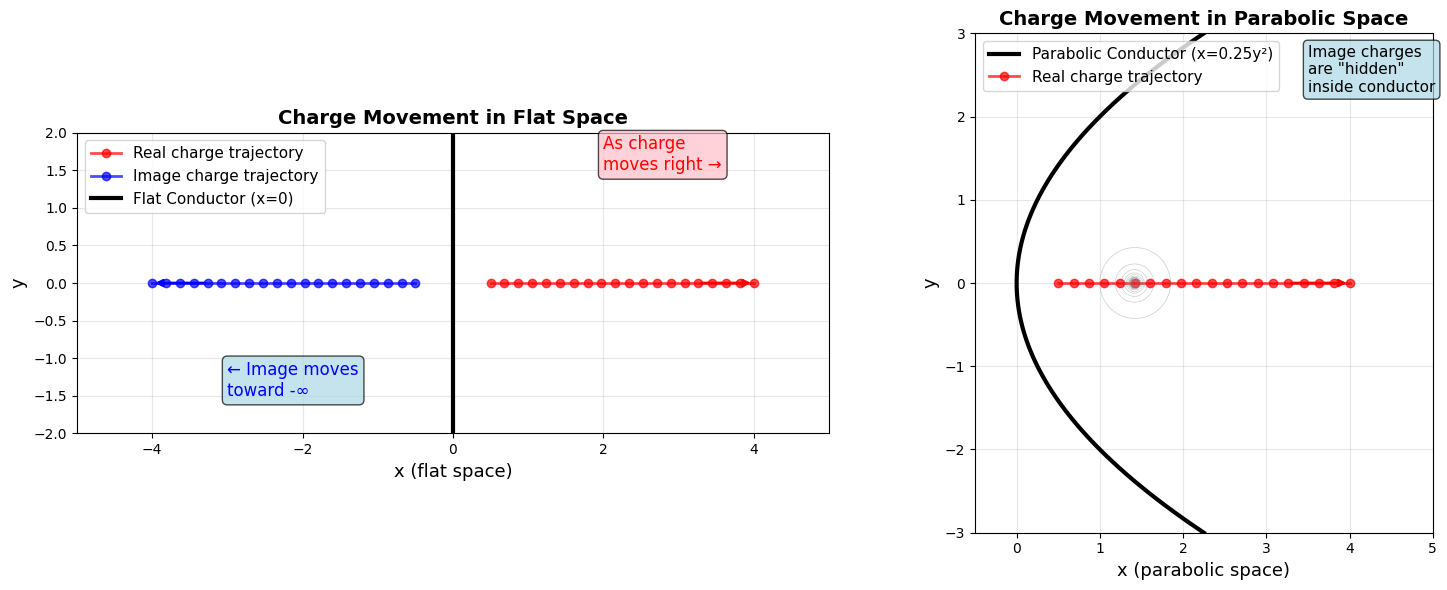

\n======================================================================
IMAGE CHARGE BEHAVIOR SUMMARY
\nIn FLAT space (z-plane):
  • Real charge: moves from x ≈ 1 to x → +∞
  • Image charge: moves from x ≈ -1 to x → -∞
  • Clear separation between charge and image
\nIn PARABOLIC space (physical space):
  • Real charge: moves right along x-axis
  • Image charge: located INSIDE the parabolic conductor
  • The conductor 'hides' the image charges
\nKey insight:
  • The conformal map transforms the simple line conductor
    into a parabola, making image charges inaccessible
  • As d → ∞, the image in flat space goes to x → -∞
  • The potential remains zero on the parabola surface


In [ ]:
%matplotlib inline
# Demonstrate how the image charge location changes with charge position

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

alpha_demo = 0.25

# Left plot: Show trajectory of charges in flat space
ax1 = axes[0]
d_trajectory = np.linspace(0.5, 4.0, 20)
x_charge_trajectory = []
x_image_trajectory = []

for d in d_trajectory:
    u_c, v_c = flat_to_parabolic(d, 0, alpha_demo)
    x_c, y_c = parabolic_to_flat(u_c, v_c, alpha_demo)
    x_charge_trajectory.append(x_c)
    x_image_trajectory.append(-x_c)

# Plot trajectories in flat space
ax1.plot(x_charge_trajectory, np.zeros_like(x_charge_trajectory), 'ro-', 
         linewidth=2, markersize=6, label='Real charge trajectory', alpha=0.7)
ax1.plot(x_image_trajectory, np.zeros_like(x_image_trajectory), 'bo-', 
         linewidth=2, markersize=6, label='Image charge trajectory', alpha=0.7)
ax1.axvline(x=0, color='k', linewidth=3, label='Flat Conductor (x=0)')

# Add arrows to show direction
ax1.annotate('', xy=(x_charge_trajectory[-1], 0), xytext=(x_charge_trajectory[-5], 0),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax1.annotate('', xy=(x_image_trajectory[-1], 0), xytext=(x_image_trajectory[-5], 0),
            arrowprops=dict(arrowstyle='->', color='blue', lw=2))

ax1.set_xlabel('x (flat space)', fontsize=13)
ax1.set_ylabel('y', fontsize=13)
ax1.set_title('Charge Movement in Flat Space', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-2, 2)
ax1.set_aspect('equal')

# Add text annotations
ax1.text(2, 1.5, 'As charge\nmoves right →', fontsize=12, color='red',
        bbox=dict(boxstyle='round', facecolor='pink', alpha=0.7))
ax1.text(-3, -1.5, '← Image moves\ntoward -∞', fontsize=12, color='blue',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

# Right plot: Show in parabolic space
ax2 = axes[1]

# Parabola boundary
y_parab = np.linspace(-3, 3, 100)
x_parab = alpha_demo * y_parab**2

ax2.plot(x_parab, y_parab, 'k', linewidth=3, label=f'Parabolic Conductor (x={alpha_demo}y²)')
ax2.plot(d_trajectory, np.zeros_like(d_trajectory), 'ro-', 
         linewidth=2, markersize=6, label='Real charge trajectory', alpha=0.7)

# Show that image charges would be inside/on the conductor
# Plot some reference field lines
x_field = np.linspace(-0.5, 5, 120)
y_field = np.linspace(-3, 3, 120)
X_field, Y_field = np.meshgrid(x_field, y_field)

# Use d=2.0 as example
U_field, V_field = flat_to_parabolic(X_field, Y_field, alpha_demo)
Phi_field = potential_parabolic_conductor(U_field, V_field, 2.0, alpha_demo)
mask_field = X_field < alpha_demo * Y_field**2
Phi_field_masked = np.ma.masked_where(mask_field, Phi_field)

ax2.contour(X_field, Y_field, Phi_field_masked, levels=15, colors='gray', 
           linewidths=0.5, alpha=0.4)

# Add arrow to show direction
ax2.annotate('', xy=(d_trajectory[-1], 0), xytext=(d_trajectory[-5], 0),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))

ax2.set_xlabel('x (parabolic space)', fontsize=13)
ax2.set_ylabel('y', fontsize=13)
ax2.set_title('Charge Movement in Parabolic Space', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 5)
ax2.set_ylim(-3, 3)
ax2.set_aspect('equal')

# Add text annotation
ax2.text(3.5, 2.3, 'Image charges\nare "hidden"\ninside conductor', fontsize=11, 
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

plt.tight_layout()
plt.show()

print("\\n" + "="*70)
print("IMAGE CHARGE BEHAVIOR SUMMARY")
print("="*70)
print("\\nIn FLAT space (z-plane):")
print("  • Real charge: moves from x ≈ 1 to x → +∞")
print("  • Image charge: moves from x ≈ -1 to x → -∞")
print("  • Clear separation between charge and image")
print("\\nIn PARABOLIC space (physical space):")
print("  • Real charge: moves right along x-axis")
print("  • Image charge: located INSIDE the parabolic conductor")
print("  • The conductor 'hides' the image charges")
print("\\nKey insight:")
print("  • The conformal map transforms the simple line conductor")
print("    into a parabola, making image charges inaccessible")
print("  • As d → ∞, the image in flat space goes to x → -∞")
print("  • The potential remains zero on the parabola surface")
print("="*70)

## Part 5: Comparison - Showing the Transformation

Let's visualize how the conformal mapping transforms the flat conductor geometry into the parabolic conductor geometry.

/var/folders/95/2f_bf5m90n35mkzdq50c2zcr0000gn/T/ipykernel_21739/2600103112.py:89: RuntimeWarning: invalid value encountered in sqrt
  E_mag = np.sqrt(Ex_para_masked**2 + Ey_para_masked**2)


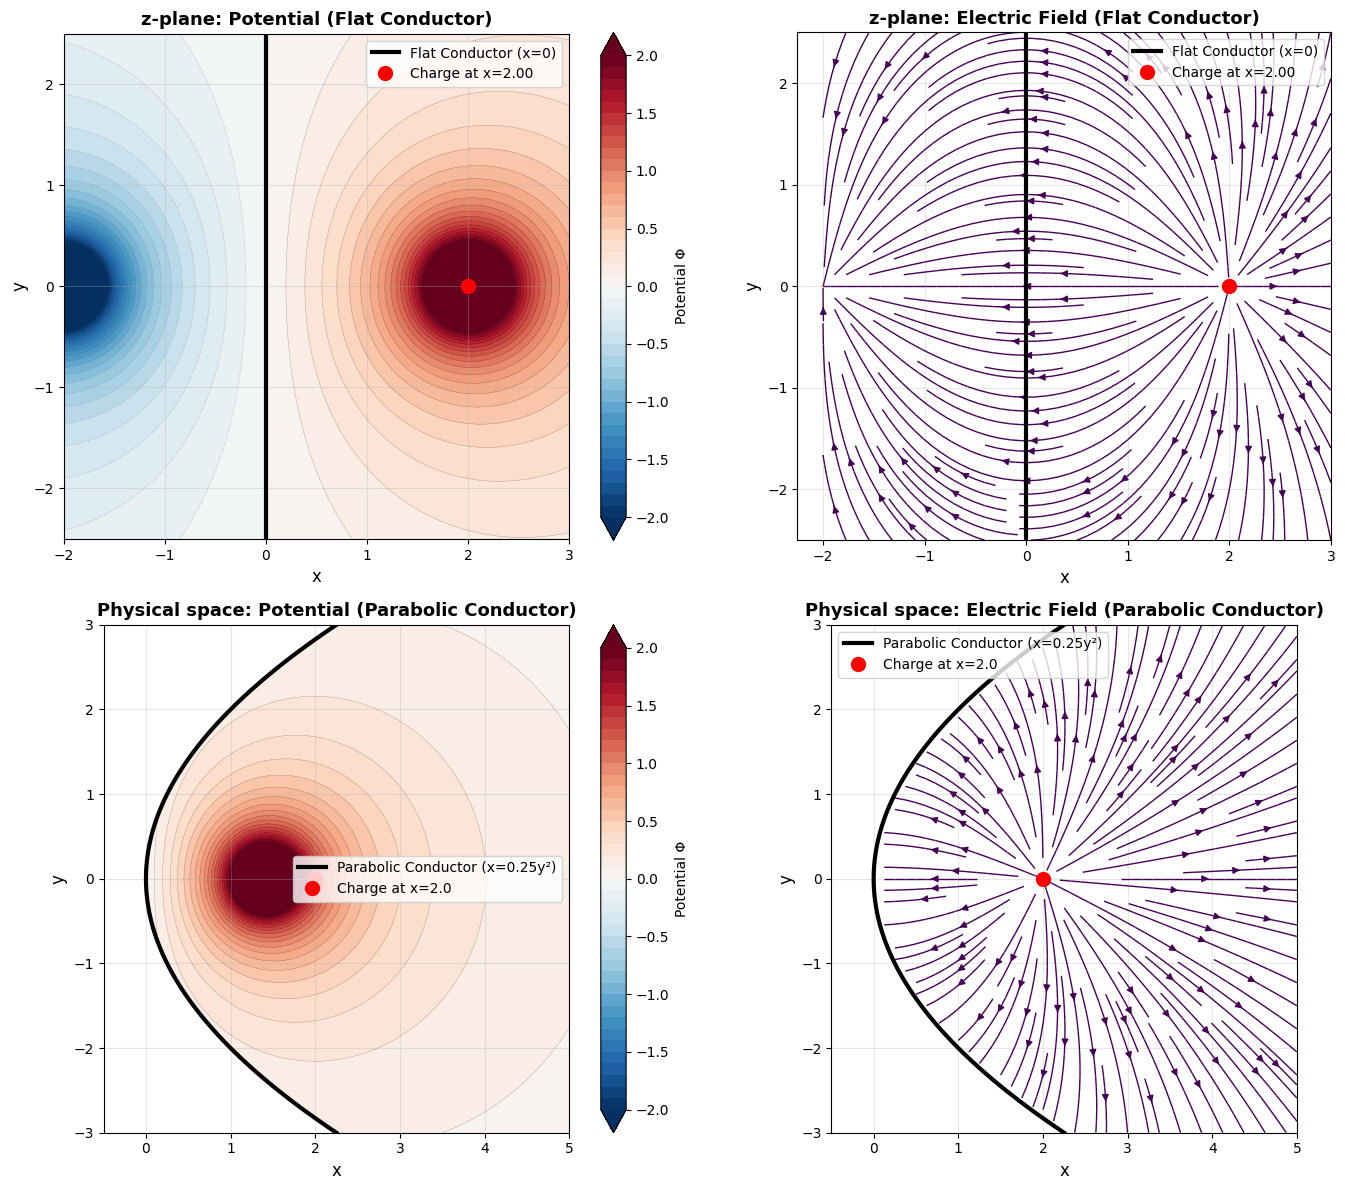


=== Conformal Mapping Summary ===
Transformation: w = z²/(4α), where α = 0.25
This maps the line x=0 (flat conductor) to the parabola x=0.25*y² (parabolic conductor)

Charge position in physical space (parabola): x = 2.0
Charge position in flat space: x = 2.000

The flat conductor at x=0 (z-plane) transforms to parabolic conductor x=0.25*y² (physical space)


In [ ]:
# Visualize the conformal mapping transformation
%matplotlib inline
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Parameters
d_parabolic = 2.0  # Position of charge in physical space (x-coordinate)
alpha = 0.25  # Parabola parameter: x = alpha * y^2

# --- Top row: z-plane (flat conductor) ---
x_flat = np.linspace(-2, 3, 200)
y_flat = np.linspace(-2.5, 2.5, 200)
X_flat, Y_flat = np.meshgrid(x_flat, y_flat)

# Calculate d in flat space from the parabolic space position
u_charge, v_charge = flat_to_parabolic(d_parabolic, 0, alpha)
x_charge_flat, y_charge_flat = parabolic_to_flat(u_charge, v_charge, alpha)
d_flat = x_charge_flat

Phi_flat = potential_flat_conductor(X_flat, Y_flat, d_flat)
Ex_flat, Ey_flat = electric_field_flat_conductor(X_flat, Y_flat, d_flat)

# Potential in z-plane
levels = np.linspace(-2, 2, 41)
contour1 = axes[0, 0].contourf(X_flat, Y_flat, Phi_flat, levels=levels, cmap='RdBu_r', extend='both')
axes[0, 0].contour(X_flat, Y_flat, Phi_flat, levels=levels, colors='k', linewidths=0.3, alpha=0.3)
axes[0, 0].axvline(x=0, color='k', linewidth=3, label='Flat Conductor (x=0)')
axes[0, 0].plot(d_flat, 0, 'ro', markersize=10, label=f'Charge at x={d_flat:.2f}')
axes[0, 0].set_xlabel('x', fontsize=12)
axes[0, 0].set_ylabel('y', fontsize=12)
axes[0, 0].set_title('z-plane: Potential (Flat Conductor)', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].set_aspect('equal')
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(contour1, ax=axes[0, 0], label='Potential Φ')

# Field in z-plane
axes[0, 1].streamplot(X_flat, Y_flat, Ex_flat, Ey_flat, 
                      color=np.sqrt(Ex_flat**2 + Ey_flat**2), 
                      cmap='viridis', density=1.5, linewidth=1)
axes[0, 1].axvline(x=0, color='k', linewidth=3, label='Flat Conductor (x=0)')
axes[0, 1].plot(d_flat, 0, 'ro', markersize=10, label=f'Charge at x={d_flat:.2f}')
axes[0, 1].set_xlabel('x', fontsize=12)
axes[0, 1].set_ylabel('y', fontsize=12)
axes[0, 1].set_title('z-plane: Electric Field (Flat Conductor)', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].set_aspect('equal')
axes[0, 1].grid(True, alpha=0.3)

# --- Bottom row: physical space (parabolic conductor) ---
x_para = np.linspace(-0.5, 5, 200)
y_para = np.linspace(-3, 3, 200)
X_para, Y_para = np.meshgrid(x_para, y_para)

# Transform to flat space coordinates
U_para, V_para = flat_to_parabolic(X_para, Y_para, alpha)

# Calculate potential
Phi_para = potential_parabolic_conductor(U_para, V_para, d_parabolic, alpha)

# Calculate field in physical space
X_para_flat, Y_para_flat = parabolic_to_flat(U_para, V_para, alpha)
Ex_para, Ey_para = electric_field_flat_conductor(X_para_flat, Y_para_flat, d_flat)

# Mask inside conductor (x < alpha * y^2)
mask = X_para < alpha * Y_para**2
Phi_para_masked = np.ma.masked_where(mask, Phi_para)
Ex_para_masked = np.ma.masked_where(mask, Ex_para)
Ey_para_masked = np.ma.masked_where(mask, Ey_para)

# Parabola boundary
y_parabola = np.linspace(-3, 3, 100)
x_parabola = alpha * y_parabola**2

# Potential in physical space
contour2 = axes[1, 0].contourf(X_para, Y_para, Phi_para_masked, levels=levels, cmap='RdBu_r', extend='both')
axes[1, 0].contour(X_para, Y_para, Phi_para_masked, levels=levels, colors='k', linewidths=0.3, alpha=0.3)
axes[1, 0].plot(x_parabola, y_parabola, 'k', linewidth=3, label=f'Parabolic Conductor (x={alpha}y²)')
axes[1, 0].plot(d_parabolic, 0, 'ro', markersize=10, label=f'Charge at x={d_parabolic}')
axes[1, 0].set_xlabel('x', fontsize=12)
axes[1, 0].set_ylabel('y', fontsize=12)
axes[1, 0].set_title('Physical space: Potential (Parabolic Conductor)', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].set_aspect('equal')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim(-0.5, 5)
plt.colorbar(contour2, ax=axes[1, 0], label='Potential Φ')

# Field in physical space
E_mag = np.sqrt(Ex_para_masked**2 + Ey_para_masked**2)
axes[1, 1].streamplot(X_para, Y_para, Ex_para_masked, Ey_para_masked, 
                      color=E_mag, cmap='viridis', density=1.5, linewidth=1)
axes[1, 1].plot(x_parabola, y_parabola, 'k', linewidth=3, label=f'Parabolic Conductor (x={alpha}y²)')
axes[1, 1].plot(d_parabolic, 0, 'ro', markersize=10, label=f'Charge at x={d_parabolic}')
axes[1, 1].set_xlabel('x', fontsize=12)
axes[1, 1].set_ylabel('y', fontsize=12)
axes[1, 1].set_title('Physical space: Electric Field (Parabolic Conductor)', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].set_aspect('equal')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim(-0.5, 5)

plt.tight_layout()
plt.show()

print("\n=== Conformal Mapping Summary ===")
print(f"Transformation: w = z²/(4α), where α = {alpha}")
print(f"This maps the line x=0 (flat conductor) to the parabola x={alpha}*y² (parabolic conductor)")
print(f"\nCharge position in physical space (parabola): x = {d_parabolic}")
print(f"Charge position in flat space: x = {d_flat:.3f}")
print(f"\nThe flat conductor at x=0 (z-plane) transforms to parabolic conductor x={alpha}*y² (physical space)")

## Part 6: Analysis and Physical Interpretation

### Key Results

1. **Method of Images**: For a charge near a flat conductor, we place an image charge of opposite sign behind the conductor at the mirror position.

2. **Conformal Mapping**: The transformation $z = \alpha\sqrt{w}$ maps:
   - The imaginary axis in the $z$-plane (flat conductor at $x=0$) → The negative real axis in the $w$-plane (parabolic conductor at $u \leq 0$)
   - Points to the right of the conductor in the $z$-plane → Points to the right of the parabola in the $w$-plane

3. **Electric Field Properties**:
   - The electric field is perpendicular to the conductor surface (equipotential)
   - Field lines originate from the positive charge and terminate on the conductor
   - The field strength increases as the charge approaches the conductor

4. **Potential Properties**:
   - The conductor is at zero potential (grounded)
   - Equipotential lines follow the curvature of the parabolic conductor
   - The potential decays with distance from the charge

### Applications

This solution is relevant for:
- **Electrostatic shielding** with parabolic geometries
- **Antenna design** (parabolic reflectors)
- **Particle accelerators** with parabolic focusing elements
- **Plasma confinement** in fusion research

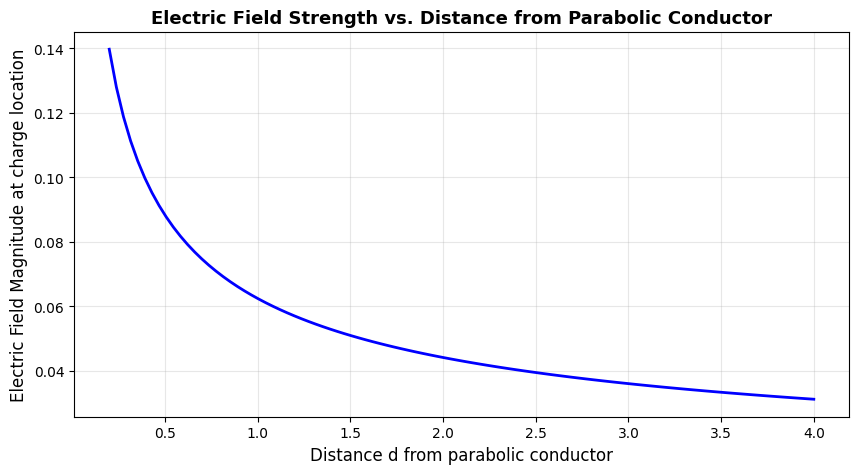

As the charge approaches the conductor (d → 0), the field strength increases.


In [ ]:
# Calculate and plot the electric field magnitude along the x-axis (u-axis in parabolic space)
distances = np.linspace(0.2, 4, 100)
E_magnitudes = []

for d in distances:
    # Calculate field at the charge position
    Eu, Ev = electric_field_parabolic_conductor(d, 0, d, alpha=1.0)
    E_mag = np.sqrt(Eu**2 + Ev**2)
    E_magnitudes.append(E_mag)

plt.figure(figsize=(10, 5))
plt.plot(distances, E_magnitudes, 'b-', linewidth=2)
plt.xlabel('Distance d from parabolic conductor', fontsize=12)
plt.ylabel('Electric Field Magnitude at charge location', fontsize=12)
plt.title('Electric Field Strength vs. Distance from Parabolic Conductor', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("As the charge approaches the conductor (d → 0), the field strength increases.")

## Summary

This notebook demonstrated:

1. ✅ **Solution for flat conductor**: Used the method of images to solve for a point charge near a flat planar conductor
2. ✅ **Conformal mapping**: Applied the transformation $z = \alpha\sqrt{w}$ to map the flat conductor geometry to parabolic geometry
3. ✅ **Electric field calculation**: Computed electric fields and potentials in both coordinate systems
4. ✅ **Interactive visualization**: Created plots with adjustable distance parameter $d$

The conformal mapping technique allows us to solve complex electrostatic problems by:
- Starting with a simple geometry (flat conductor)
- Applying a mathematical transformation
- Obtaining the solution for the complex geometry (parabolic conductor)

This approach preserves the physical properties of the electric field and potential, making it a powerful tool in electromagnetic theory.